# **Project Title :-**
## **Chronic Kidney Disease Prediction Using Machine Learning Algorithms**

# **Data Source**

The dataset taken from the kaggle website which is free to use.The dataset contains 400 rows and 26 columns.The dataset has the 26 features as follows with data types :  


1.   age                             :-  float64
2.   bp[blood pressure]              :-  float64
3.   sg['specific_gravity']          :-  float64
4.   al['albumin']                   :-  float64
5.   su['sugar']                     :-  float64
6.   rbc ['red_blood_cells']         :-  object 
7.   pc ['pus_cell',]                :-  object 
8.   pcc['pus_cell_clumps']          :-  object 
9.   ba['bacteria']                  :-  object 
10.  bgr ['blood_glucose_random']    :-  float64
11.  bu['blood_urea']                :-  float64
12.  sc ['serum_creatinine']         :-  float64
13.  sod ['sodium']                  :-  float64
14.  pot  ['potassium']              :-  float64
15.  hemo['haemoglobin']             :-  float64
16.  pcv['packed_cell_volume']       :-  object 
17.  wc ['white_blood_cell_count']   :-  object 
18.  rc ['red_blood_cell_count']     :-  object 
19.  htn ['hypertension']            :-  object 
20.  dm  ['diabetes_mellitus']       :-  object 
21.  cad ['coronary_artery_disease'] :-  object 
22.  appet ['appetite']              :-  object 
23.  pe ['peda_edema']               :-  object 
24.  ane ['aanemia']                 :-  object 
25.  classification                  :-  object 

# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import missingno as msn
# import plotly.express as px

## **Reading CSV file using url file path**

In [2]:
df=pd.read_csv(r"https://raw.githubusercontent.com/patilgirish815/Kidney_Cancer_Prediction_Using_Machine_Learning/main/dataset/kidney_disease.csv")

# **Describe Data**

### **Shape function:-**
##### The shape function shows the no. of rows and the no. of columns

In [3]:
df.shape

(400, 26)

### **Head function:-**
##### The shape function shows the 5 records

In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


### **Describe function:-**
##### The describe function shows the average , minimum ,standard deviation ,maximum,count 25% of column,50% of column,75% of column of the each column.

In [5]:
df.describe(include="all")

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,248,335,396,396,...,330,295,270,398,398,398,399,399,399,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,...,44,92,49,2,5,3,2,2,2,3
top,NaN,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,...,41,9800,5.2,no,no,no,good,no,no,ckd
freq,NaN,NaN,NaN,NaN,NaN,NaN,201,259,354,374,...,21,11,18,251,258,362,317,323,339,248
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Info function:-**
##### The info function shows no. of null values in the each column and the data type of the each column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

### **dtypes function:-**
##### The dtypes function shows data type of each column.

In [7]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

# **Data Preprocessing**

### **isnull function:-**
##### The isnull function shows null values present in each column.

In [8]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

## **CHECKING NO OF NULL VALUES THROUGH VISUALIZATION**

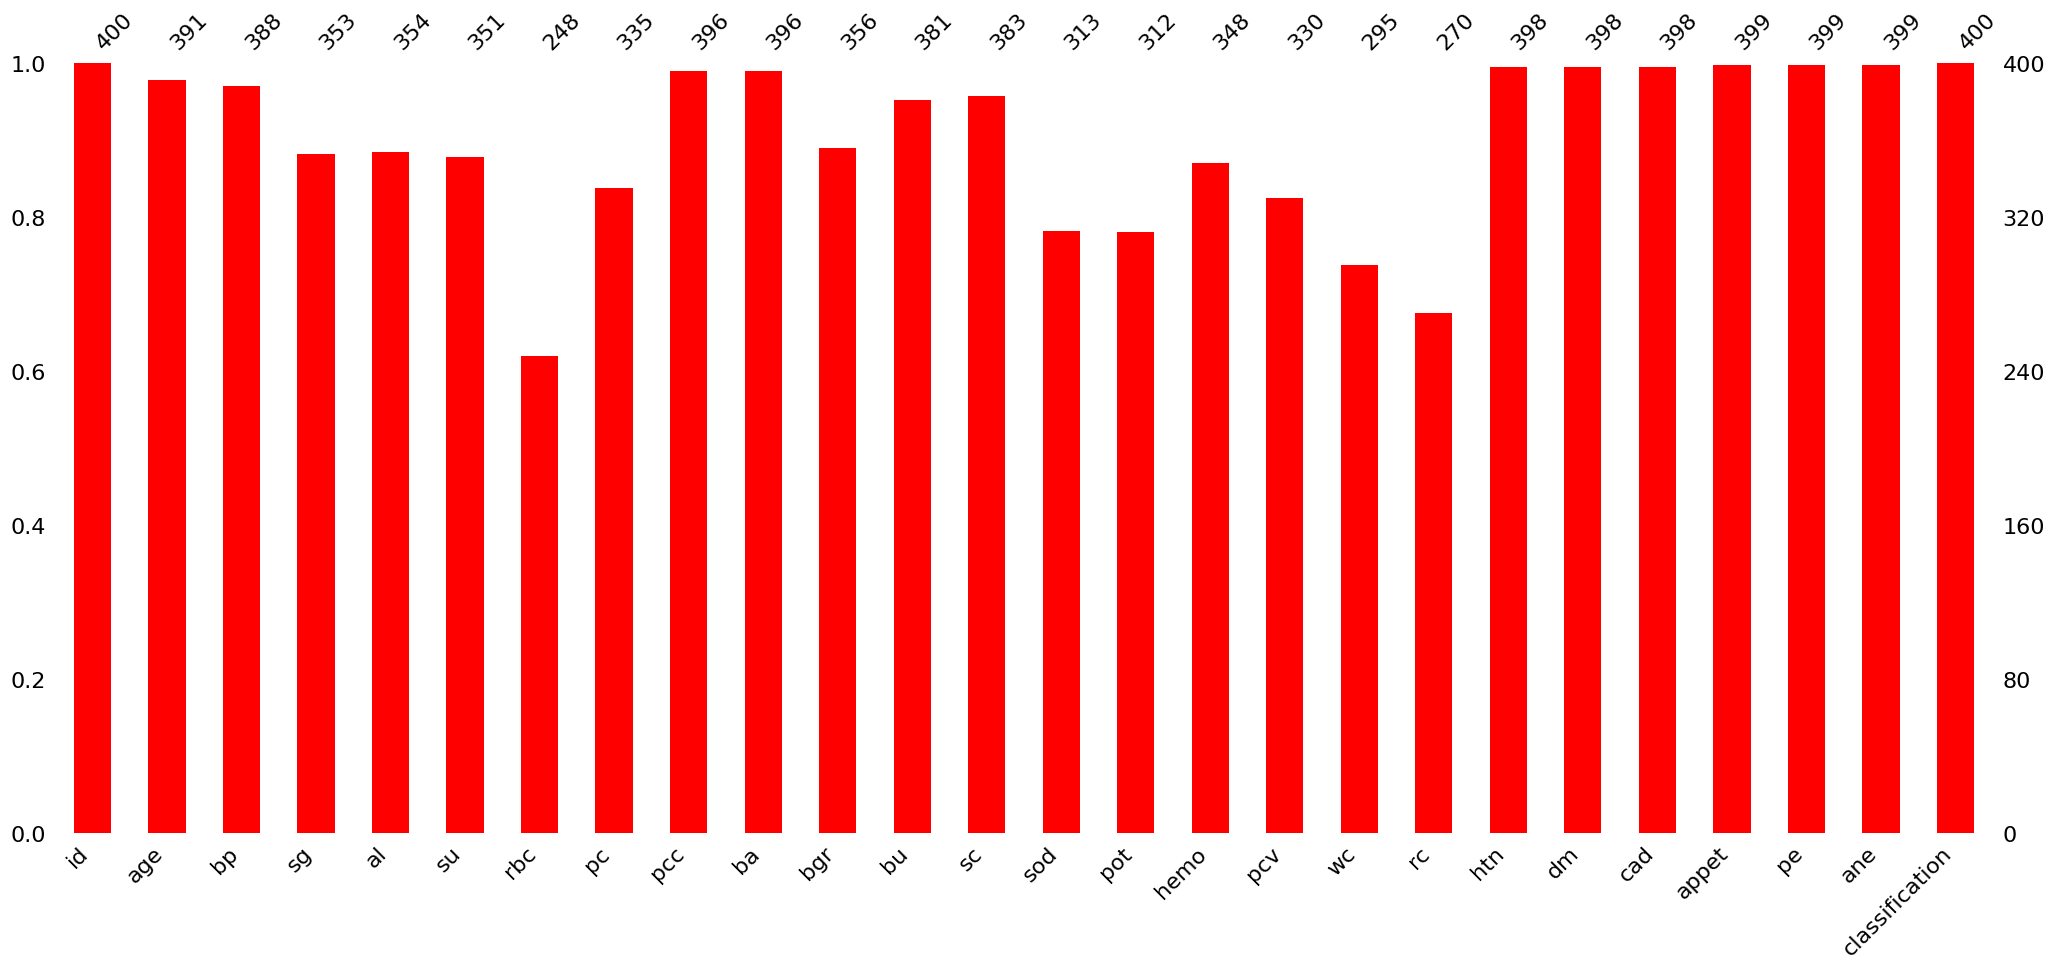

In [9]:
import missingno as msn
msn.bar(df,color="red");

In [10]:
df.isnull()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### **duplicated function:-**
##### The duplicated function checks the duplicate values present in the dataset.

In [11]:
df.duplicated().value_counts()

False    400
Name: count, dtype: int64

## **FINDING COUNT OF CKD AND NOT CKD AND CHANGING CKT/T VALUES TO CKD**

In [12]:
df['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [13]:
df['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [14]:
df[df["classification"]=="ckd\t"]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
37,37,72.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,28,6900,2.5,yes,yes,no,poor,no,yes,ckd\t
230,230,65.0,60.0,1.01,2.0,0.0,normal,abnormal,present,notpresent,...,NaN,9500,NaN,yes,yes,no,poor,no,no,ckd\t


In [15]:
df["classification"]=df["classification"].replace("ckd\t","ckd",regex=True)

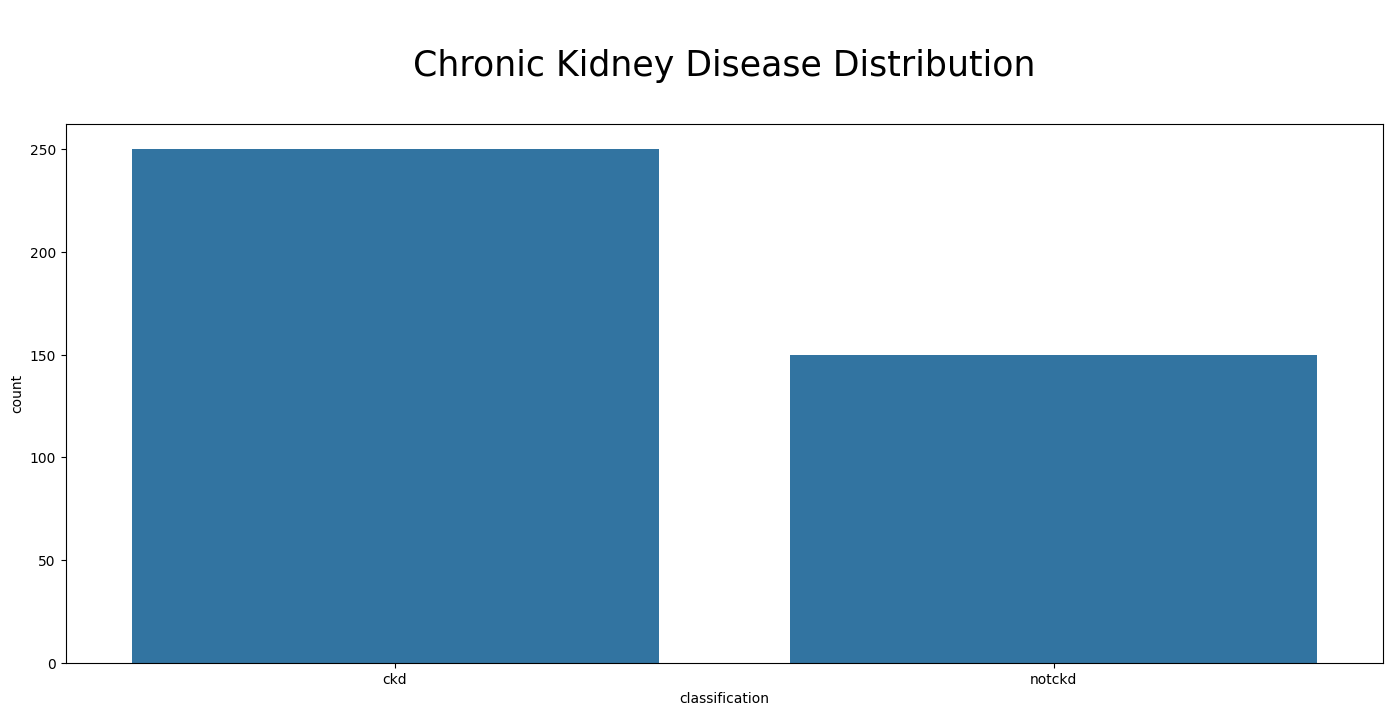

In [16]:
plt.figure(figsize=(17,7))
sns.countplot(data=df, x="classification")
plt.title("\nChronic Kidney Disease Distribution\n", fontsize=25)
plt.show();

In [17]:
df["age"].isnull().sum()

np.int64(9)

In [18]:
df["age"]=df["age"].fillna(df["age"].mean())

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

##### *Here,we will fill all values of float64 datatype with the median and mode*

In [20]:
numerical = []
for col in df.columns:
    if df[col].dtype == "float64":
        numerical.append(col)

print(numerical)

for col in df.columns:
    if col in numerical:
        # Assign the result back to the column
        df[col] = df[col].fillna(df[col].median())
    else:
        # Assign the result back to the column
        df[col] = df[col].fillna(df[col].mode()[0])

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']


## LABEL ENCODER

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
object_col = [col for col in df.columns if df[col].dtype == 'object']
for col in object_col:
    df[col] = le.fit_transform(df[col])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    int64  
 7   pc              400 non-null    int64  
 8   pcc             400 non-null    int64  
 9   ba              400 non-null    int64  
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    int64  
 17  wc              400 non-null    int

In [23]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,32,72,34,1,4,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,26,56,34,0,3,1,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,19,70,34,0,4,1,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,20,62,19,1,3,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,23,68,27,0,3,1,0,0,0,0


In [24]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

# **Data Visualization**

##### *The normal range of the blood urea is between 15 to 40 When blood urea increases above 40 then the chances of the kidney failure increases can be seen  from the scatter plot*

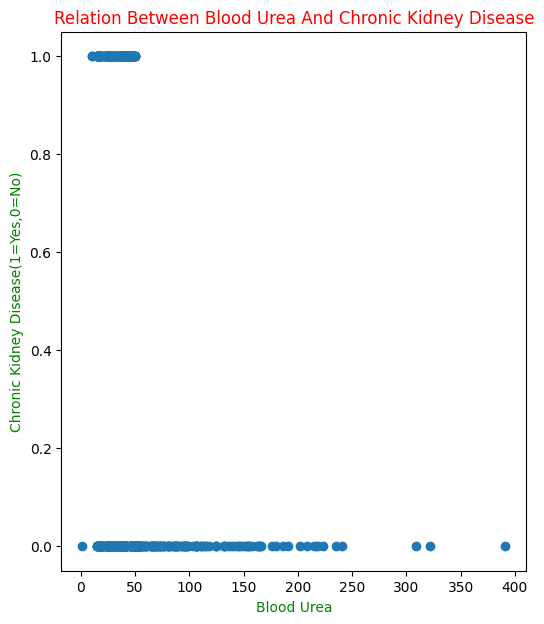

In [25]:
fig, ax = plt.subplots(figsize=(6,7))
M=df[['bu']]
N=df[['classification']]
plt.title("Relation Between Blood Urea And Chronic Kidney Disease",color="red");
plt.xlabel("Blood Urea",color="green")
plt.ylabel("Chronic Kidney Disease(1=Yes,0=No)",color="green")
ax.scatter(M,N);
plt.show();

##### *The normal range of the serum creatine is between 0.5 to 1.5 When Serum Creatine increases above 1.5 then the chances of the kidney failure increases can be seen  from the scatter plot*


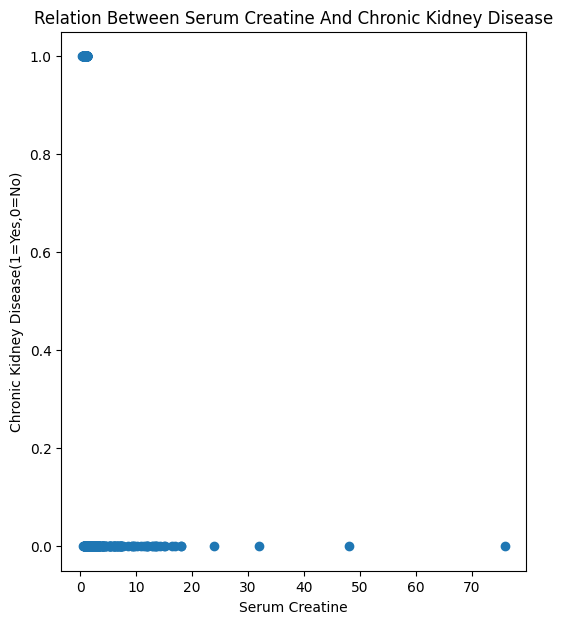

In [26]:
fig, ax = plt.subplots(figsize=(6,7))
M=df[['sc']]
N=df[['classification']]
plt.title("Relation Between Serum Creatine And Chronic Kidney Disease");
plt.xlabel("Serum Creatine")
plt.ylabel("Chronic Kidney Disease(1=Yes,0=No)")
ax.scatter(M,N);
plt.show();

##### *Due to the hypertension mainly kidney failure occurs.*

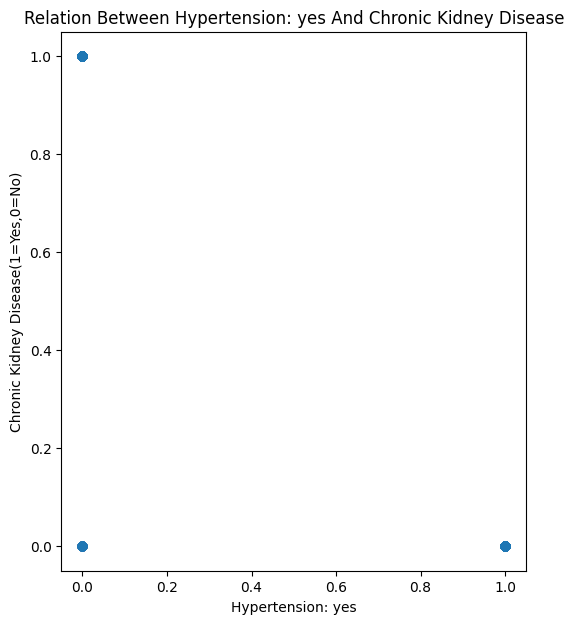

In [27]:
fig, ax = plt.subplots(figsize=(6,7))
M=df[['htn']]
N=df[['classification']]
plt.title("Relation Between Hypertension: yes And Chronic Kidney Disease");
plt.xlabel("Hypertension: yes")
plt.ylabel("Chronic Kidney Disease(1=Yes,0=No)")
ax.scatter(M,N);
plt.show();

##### *When urine albumin increses above its normal range then it first leads to protein leakage i.e, the first stage of the kidney failure if not treated or diagonosed at that time which leads to the kidney failure.*

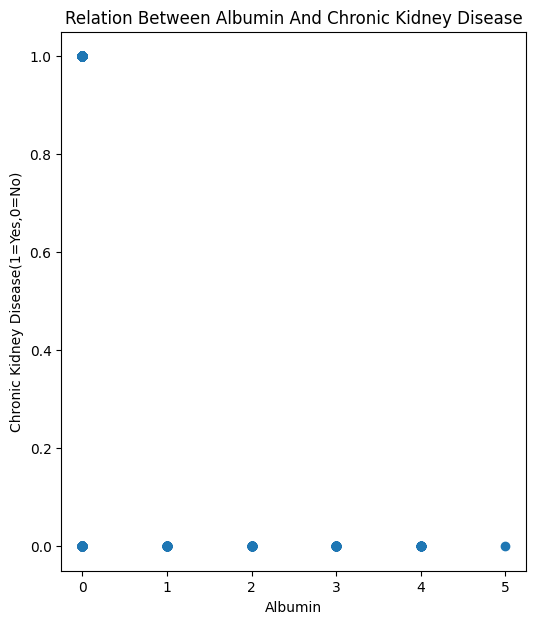

In [28]:
fig, ax = plt.subplots(figsize=(6,7))
M=df[['al']]
N=df[['classification']]
plt.title("Relation Between Albumin And Chronic Kidney Disease");
plt.xlabel("Albumin")
plt.ylabel("Chronic Kidney Disease(1=Yes,0=No)")
ax.scatter(M,N);
plt.show();

##### *The diabetics is also one of the main reason for the kidney failure.*

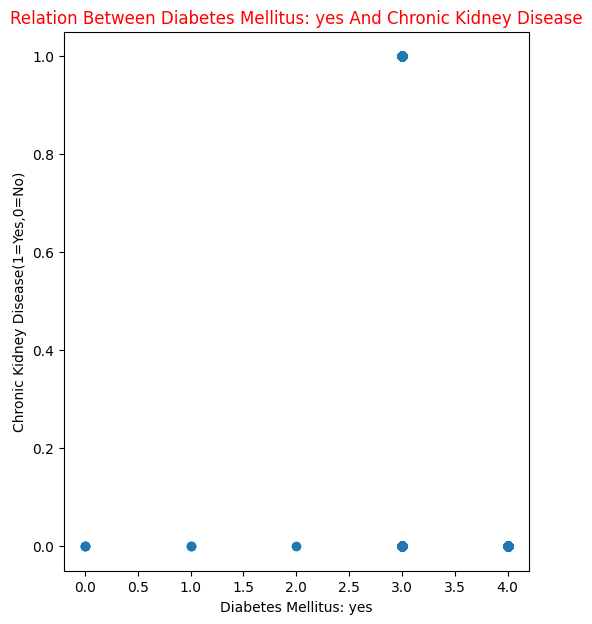

In [29]:
fig, ax = plt.subplots(figsize=(6,7))
M=df[['dm']]
N=df[['classification']]
plt.title("Relation Between Diabetes Mellitus: yes And Chronic Kidney Disease",color="red");
plt.xlabel("Diabetes Mellitus: yes")
plt.ylabel("Chronic Kidney Disease(1=Yes,0=No)")
ax.scatter(M,N);
plt.show();

## **Get Unique Values(Class or Labels) in y variable**

Here,
1=Yes
0=No

In [30]:
df['classification'].shape

(400,)

In [31]:
df.groupby("classification").mean()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
classification,,,,,,,,,,,,,,,,,,,,,
0,124.5,54.443468,79.640000,1.014940,1.44,0.632,0.812,0.696,0.168,0.088,...,11.016000,23.048000,65.924,26.688,0.588,3.48,1.128,0.328,0.304,0.24
1,324.5,46.549889,71.466667,1.022333,0.00,0.000,1.000,1.000,0.000,0.000,...,15.086667,34.193333,60.540,35.420,0.000,3.00,1.000,0.000,0.000,0.00


In [32]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

## **Defining Target or Dependent Variable (y) and Feature or Independent Variables (X)**

In [33]:
X=df[[ 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane']]
y=df[['classification']]

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=222)

In [35]:
print("Training Data ::-")
print("The shape of X training data is :-" ,X_train.shape)
print("The shape of y training data is :-" ,y_train.shape)

Training Data ::-
The shape of X training data is :- (300, 24)
The shape of y training data is :- (300, 1)


In [36]:
print("Testing Data ::-")
print("The shape of X testing data is :-" ,X_test.shape)
print("The shape of y testing data is :-" ,y_test.shape)

Testing Data ::-
The shape of X testing data is :- (100, 24)
The shape of y testing data is :- (100, 1)


## **Checking the correlated variables using heatmap(Pearson Correlation)**

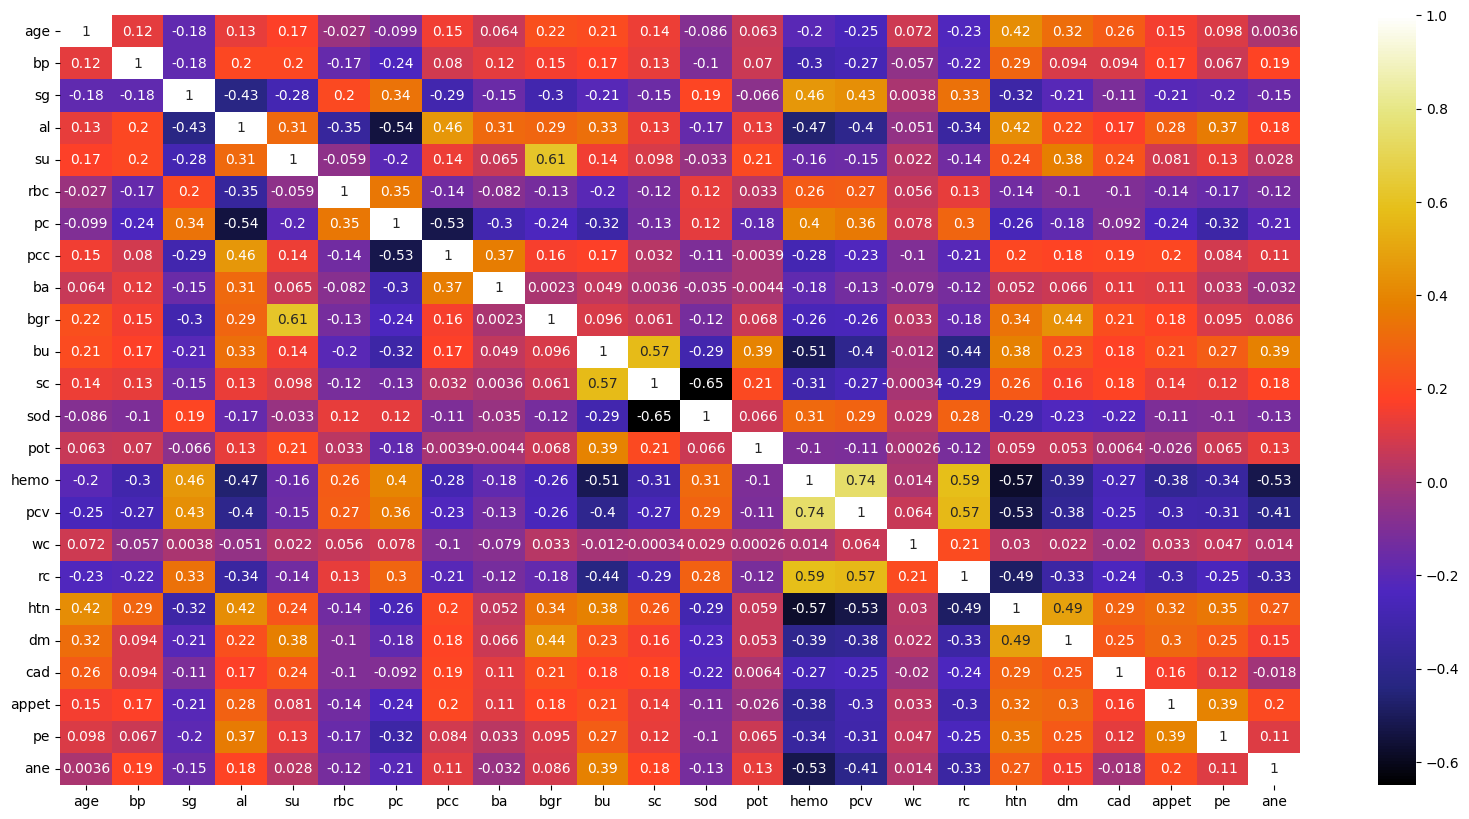

In [37]:
import seaborn as sns
plt.figure(figsize=(20,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap)
plt.show();

In [38]:
# By using this function we can select correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [39]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

1

In [40]:
corr_features

{'pcv'}

In [41]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pot,hemo,wc,rc,htn,dm,cad,appet,pe,ane
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,4.4,11.30,56,34,0,3,1,0,0,0
201,64.0,70.0,1.020,0.0,0.0,1,1,0,0,113.0,...,4.3,7.90,90,34,1,4,2,0,1,1
194,80.0,70.0,1.010,2.0,0.0,1,0,0,0,121.0,...,4.4,12.65,90,34,1,1,1,0,0,0
184,54.0,60.0,1.015,3.0,2.0,1,0,0,0,352.0,...,4.5,11.30,54,16,1,4,2,1,1,0
125,72.0,90.0,1.020,0.0,0.0,1,1,0,0,308.0,...,4.3,12.65,90,34,1,4,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,41.0,70.0,1.020,0.0,0.0,1,1,0,0,125.0,...,5.0,16.80,58,41,0,3,1,0,0,0
272,56.0,80.0,1.025,0.0,0.0,1,1,0,0,139.0,...,5.0,14.80,52,37,0,3,1,0,0,0
370,69.0,70.0,1.020,0.0,0.0,1,1,0,0,83.0,...,3.7,16.20,85,36,0,3,1,0,0,0
374,79.0,80.0,1.025,0.0,0.0,1,1,0,0,111.0,...,3.6,16.30,74,46,0,3,1,0,0,0


# **Modeling**

## **1.** ***Logistic Regression***
It is an supervised learning algorithm which is used for the solving classification problems.

In [42]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=200,random_state=222)
model

LogisticRegression(max_iter=200, random_state=222)

In [43]:
model.fit(X_train,y_train)

/Users/subin/Desktop/ml/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/subin/Desktop/ml/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=222)

# **Prediction**

In [44]:
y_predic=model.predict(X_test)
print(y_predic)

[0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1
 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1]


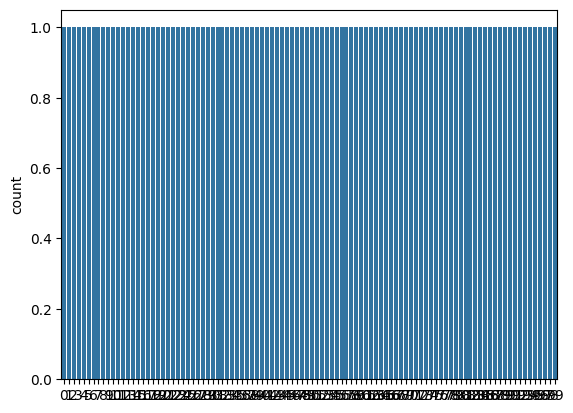

In [45]:
sns.countplot(y_predic);

## **Probability of Each Predicted Class**

In [46]:
model.predict_proba(X_test)

array([[9.99397334e-01, 6.02665954e-04],
       [1.00000000e+00, 8.25255019e-12],
       [9.95922606e-01, 4.07739381e-03],
       [1.00000000e+00, 4.28067260e-14],
       [9.99999962e-01, 3.76515154e-08],
       [9.92983277e-01, 7.01672296e-03],
       [9.99998284e-01, 1.71561222e-06],
       [9.99999964e-01, 3.57590023e-08],
       [1.00000000e+00, 3.90954187e-10],
       [6.48434250e-03, 9.93515658e-01],
       [1.00000000e+00, 1.09098573e-19],
       [7.72736854e-05, 9.99922726e-01],
       [1.50552827e-03, 9.98494472e-01],
       [3.40072525e-03, 9.96599275e-01],
       [9.99999904e-01, 9.56581455e-08],
       [9.99969337e-01, 3.06627894e-05],
       [9.61626410e-05, 9.99903837e-01],
       [9.99997566e-01, 2.43367438e-06],
       [9.99628978e-01, 3.71021849e-04],
       [1.80622726e-02, 9.81937727e-01],
       [2.82098033e-01, 7.17901967e-01],
       [9.97403447e-01, 2.59655318e-03],
       [1.00000000e+00, 1.16988073e-10],
       [1.57311782e-04, 9.99842688e-01],
       [1.000000

# **Model Evaluation**

In [47]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [48]:
print("Accuracy of the model is :  %3f " % accuracy_score(y_test,y_predic))

Accuracy of the model is :  0.990000 


In [49]:
print(confusion_matrix(y_test,y_predic))

[[56  1]
 [ 0 43]]


In [50]:
print(classification_report(y_test, y_predic))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        57
           1       0.98      1.00      0.99        43

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



# **2.** ***Decision Tree Classifier Algorithm***
Decision Tree is an supervised learning algorithm which is used for both classification and regression problems.Decision tree classifier is mostly used for the classification problems.From decision tree ,get set of rules for classifing the problem.

# **Modeling** 

In [51]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=222)

In [52]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=222)

# **Prediction**

In [53]:
y_predict=model.predict(X_test)
print(y_predict)

[0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1
 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0
 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1]


## **Probability of Each Predicted Class**

In [54]:
print(model.predict_proba(X_test))

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


# **Model Evaluation**

In [55]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [56]:
print(confusion_matrix(y_test,y_predict))

[[55  2]
 [ 0 43]]


In [57]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        57
           1       0.96      1.00      0.98        43

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



## **Plotting the Decision Tree**

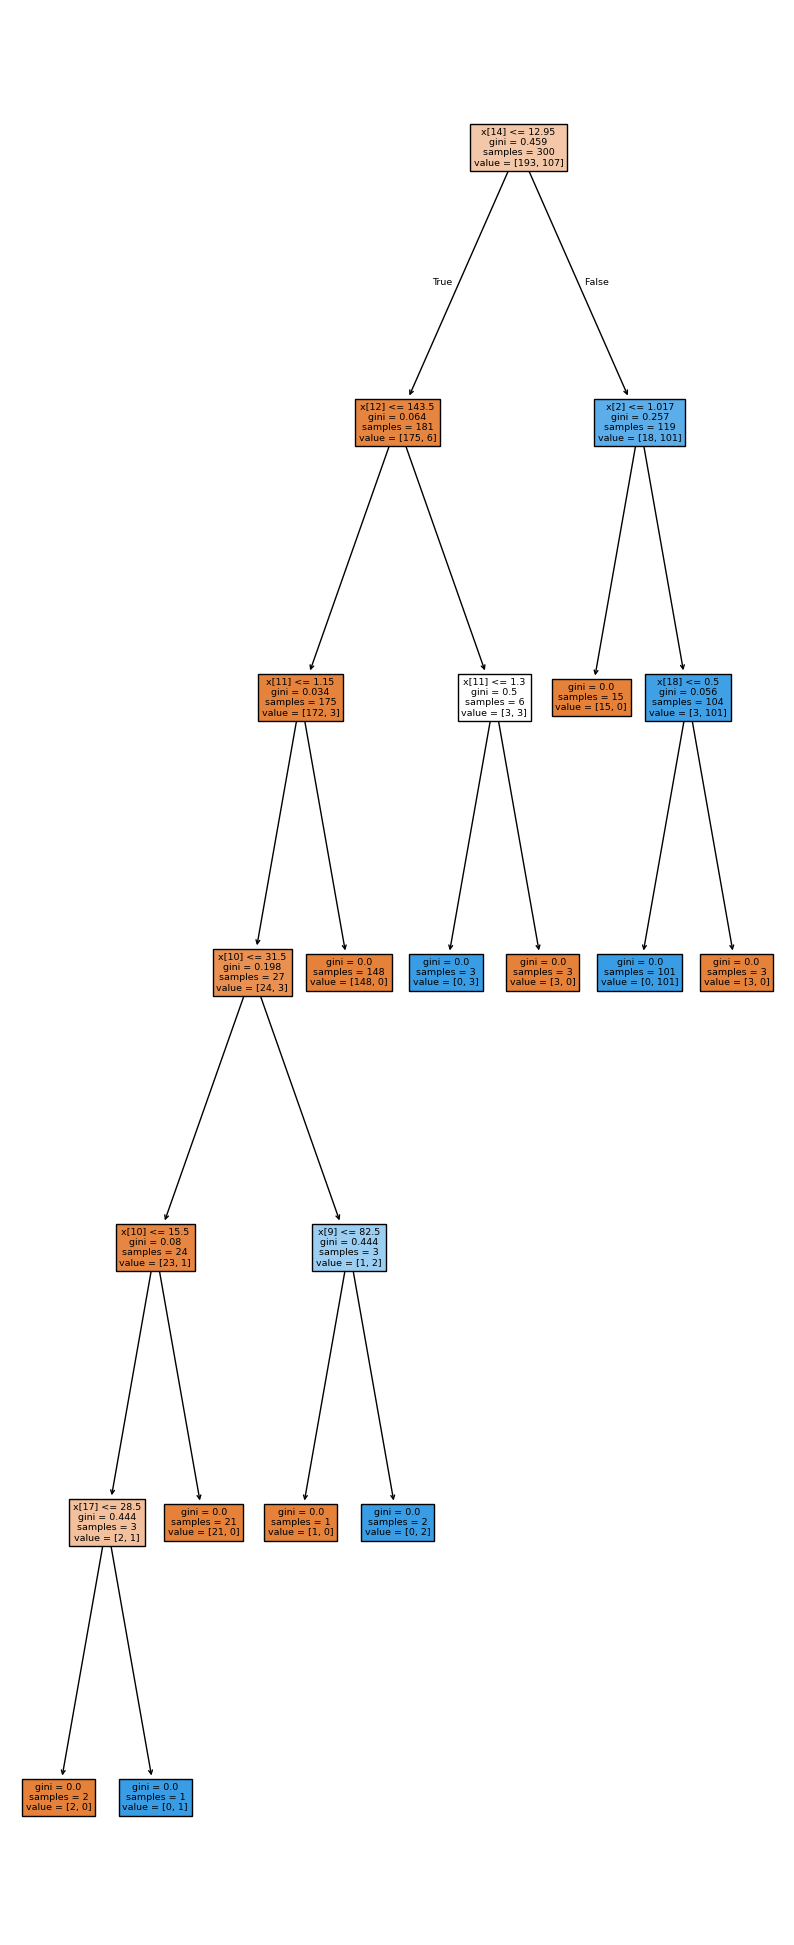

In [58]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,25))
plot_tree(model,filled=True);

# **3.** ***K-Nearest Neighbors***
It is an supervised learning algorithm which is used for both regression and classification problems but mostly used for the classification problems.


# **Modeling**

In [59]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [60]:
model.fit(X_train,y_train)

/Users/subin/Desktop/ml/venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

# **Prediction**

In [61]:
y_predict=model.predict(X_test)
print(y_predict)

[1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1
 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0
 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1]


## **Probability of Each Predicted Class**

In [62]:
print(model.predict_proba(X_test))

[[0.4 0.6]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 [1.  0. ]
 [0.4 0.6]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.4 0.6]
 [0.  1. ]
 [0.4 0.6]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.4 0.6]
 [0.2 0.8]
 [0.2 0.8]
 [0.4 0.6]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.6 0.4]
 [0.  1. ]
 [1.  0. ]
 [0.8 0.2]
 [0.6 0.4]
 [0.4 0.6]
 [0.  1. ]
 [1.  0. ]
 [0.2 0.8]
 [1.  0. ]
 [0.2 0.8]
 [0.2 0.8]
 [0.6 0.4]
 [0.  1. ]
 [0.2 0.8]
 [0.2 0.8]
 [0.6 0.4]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.2 0.8]
 [0.  1. ]
 [0.8 0.2]
 [0.  1. ]
 [0.2 0.8]
 [0.4 0.6]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.2 0.8]
 [1.  0. ]
 [1.  0. ]
 [0.2 0.8]
 [0.6 0.4]
 [0.2 0.8]
 [1.  0. ]
 [0.4 0.6]
 [0.  1. ]
 [1.  0. ]
 [0.4 0.6]
 [0.2 0.8]
 [0.8 0.2]
 [0.6 0.4]
 [0.2 0.8]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [0.2 0.8]
 [1.  0. ]
 [0.  1. ]
 [0.4 0.6]
 [1.  0. ]
 [1.  0. ]
 [0.6 0.4]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.6 0.4]
 [0.2 0.8]
 [0.4 0.6]
 [0.  1. ]
 [1.  0. ]

# **Model Evaluation**

In [63]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [64]:
print(confusion_matrix(y_test,y_predict))

[[45 12]
 [ 6 37]]


In [65]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        57
           1       0.76      0.86      0.80        43

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.83      0.82      0.82       100



# 4. Proposed Model

DyCKD-Net is a Voting Classifier that combines the predictions of two individual models: Logistic Regression and Random Forest Classifier. By using a "soft" voting mechanism, it calculates the average of predicted probabilities from both models to make the final prediction. This ensemble approach leverages the strengths of both algorithms, improving the overall performance and robustness of the model. 

In [66]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define individual models
log_reg = LogisticRegression()
rf = RandomForestClassifier()

# DyCKD-Net (Voting Classifier)
dyckd_net = VotingClassifier(estimators=[
    ('lr', log_reg), ('rf', rf)], voting='soft')

# Train the model
dyckd_net.fit(X_train, y_train)

# Evaluate the model
accuracy = dyckd_net.score(X_test, y_test)
print(f"DyCKD-Net Accuracy: {accuracy * 100:.2f}%")

/Users/subin/Desktop/ml/venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/subin/Desktop/ml/venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/subin/Desktop/ml/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver optio

DyCKD-Net Accuracy: 99.00%


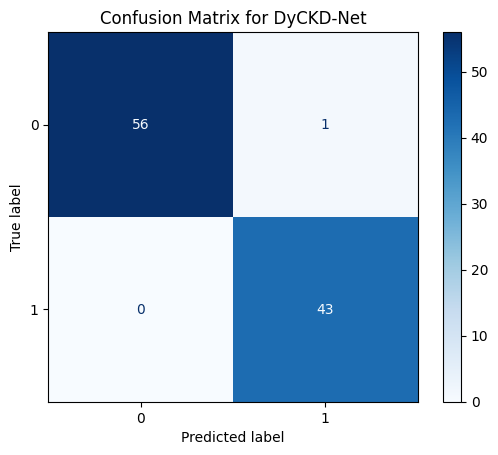

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions for the test set
y_pred_dyckd = dyckd_net.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_dyckd)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dyckd_net.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for DyCKD-Net")
plt.show()

In [68]:
from sklearn.metrics import classification_report

# Generate the classification report for DyCKD-Net
print(classification_report(y_test, y_pred_dyckd))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        57
           1       0.98      1.00      0.99        43

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



# **Explanation**
In this project,For classification of the chronic kidney disease four algorithms are used which are


1.   Logistic Regression
2.   Decision Tree Classifier
3.   K-Nearest Neighbour
4.   DyCKD-Net (Voting Classifier)

the model has got the accuracies as 99%, 98%, 82% and 99% respectively. from these accuracies it is found that model performs well for DyCKD-Net(Voting Classifier).

